### import required library 

In [82]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, average_precision_score

In [25]:
# Load the clean dataset of used cars
data = pd.read_csv("../Data/cars_synth_clean.csv")
data.head()

,type,color,year,length,condition,width,weight,price
0,SUV,Black,2022,3.33,Poor,2.172119,3220,11621
1,SUV,Black,2022,3.44,Average,2.050049,3588,11795
2,Standard,Green,2018,3.21,Good,2.485968,3105,8811
3,Standard,Green,2013,3.07,Average,2.940257,3069,5995
4,SUV,Purple,2022,3.20,Good,2.123088,3349,12073


### Show data and explore

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   type       1000 non-null   object 
 1   color      1000 non-null   object 
 2   year       1000 non-null   int64  
 3   length     1000 non-null   float64
 4   condition  1000 non-null   object 
 5   width      1000 non-null   float64
 6   weight     1000 non-null   int64  
 7   price      1000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [27]:
data.describe()

,year,length,width,weight,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2019.16200,3.145000,2.295049,3138.289000,10186.74100
std,5.29753,0.178775,0.297817,305.489983,3592.23225
min,1954.00000,2.740000,0.014319,2114.000000,3738.00000
25%,2018.00000,3.000000,2.090694,2911.750000,7755.00000
50%,2021.00000,3.150000,2.228019,3134.000000,9674.50000
75%,2022.00000,3.280000,2.471600,3347.000000,12024.00000
max,2023.00000,3.660000,3.156729,4072.000000,28212.00000


<Axes: >

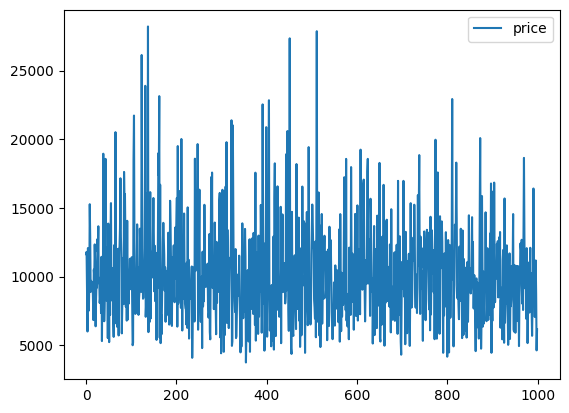

In [28]:
data[["price"]].plot()

In [46]:
# plot width and price 


### Replace the column price 

In [38]:
data.loc[data["price"] > 12000, "12k+"] = 1
data.loc[data["price"] <= 12000, "12k+"] = 0
data.head()

,type,color,year,length,condition,width,weight,price,12k+
0,SUV,Black,2022,3.33,Poor,2.172119,3220,11621,0.0
1,SUV,Black,2022,3.44,Average,2.050049,3588,11795,0.0
2,Standard,Green,2018,3.21,Good,2.485968,3105,8811,0.0
3,Standard,Green,2013,3.07,Average,2.940257,3069,5995,0.0
4,SUV,Purple,2022,3.20,Good,2.123088,3349,12073,1.0


<Axes: >

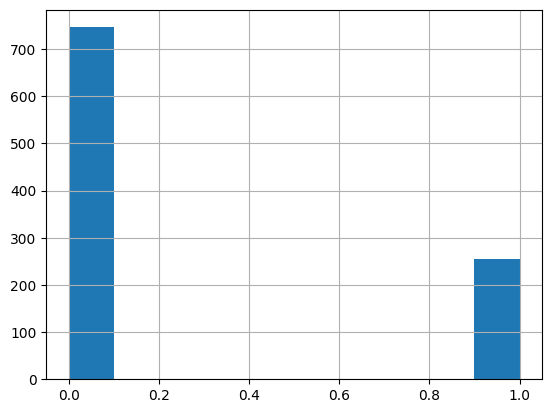

In [39]:
data["12k+"].hist()

### Train a Logistic Regression and a Decision Tree Classifier(limit leafs=20).

In [60]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(data[["width", "year", "length", "weight"]], data[["12k+"]], test_size=0.33, random_state=42)
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (670, 4)
Shape of y_train:  (670, 1)
Shape of X_test:  (330, 4)
Shape of y_test:  (330, 1)


In [61]:
# Logistic Regression 
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [62]:
y_width_pred = log_reg.predict(X_test)
y_width_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0.

In [63]:
y_test = y_test.values

In [72]:
y_test

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],

In [65]:
# evaluation 
# transform y_test from dataframe to array 
precision_score_width = precision_score(y_test, y_width_pred)
recall_score_width = recall_score(y_test, y_width_pred)
accuracy_score_width = accuracy_score(y_test, y_width_pred)
f1_score_width = f1_score(y_test, y_width_pred)

print("Precision score: ", precision_score_width)
print("Recall score: ", recall_score_width)
print("Accuracy score: ", accuracy_score_width)
print("f1 score: ", f1_score_width)

Precision score:  0.5681818181818182
Recall score:  0.3246753246753247
Accuracy score:  0.7848484848484848
f1 score:  0.4132231404958678


In [79]:
confusion_ = confusion_matrix(y_test, y_width_pred, labels=log_reg.classes_)
confusion_

array([[234,  19],
       [ 52,  25]])

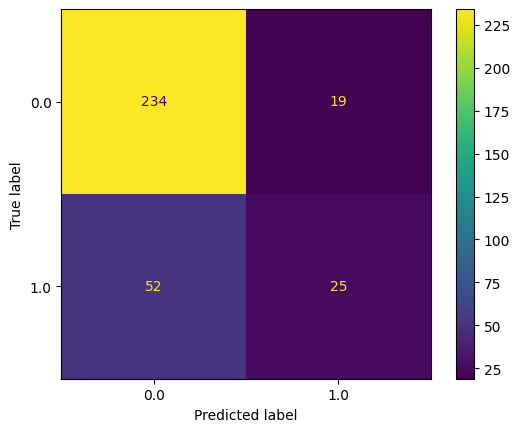

In [80]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_, display_labels=log_reg.classes_)
disp.plot()

In [89]:
# using Decision Tree Classification 
tree_class = DecisionTreeClassifier(max_leaf_nodes=20)
tree_class.fit(X_train, y_train)
y_pred_tree = tree_class.predict(X_test)

In [91]:
# Evaluation 
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print("Precision of decision tree: ", precision_tree)
print("Recall of decision tree: ", recall_tree)
print("Acc of decision tree: ", acc_tree)
print("f1_score of decision tree: ", f1_tree)

Precision of decision tree:  0.5483870967741935
Recall of decision tree:  0.6623376623376623
Acc of decision tree:  0.793939393939394
f1_score of decision tree:  0.6


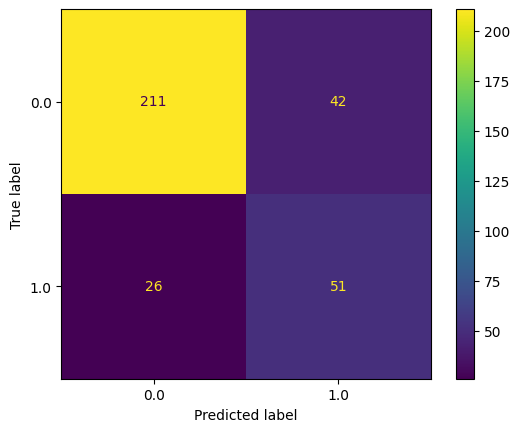

In [93]:
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_tree), 
                           display_labels=tree_class.classes_)
cm.plot()

#####  Compute also the Average Precision and the AUC. Since they are based on a ranking of scores, you need to use the predict proba function of classifiers to compute scores.

In [83]:
average_ = average_precision_score(y_test, y_width_pred)
print(average_)

0.34205037386855575
